In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import fitsio
import os 
import desiutil.plots as desiplot

In [2]:
fba_files = glob.glob('/global/cfs/cdirs/desi/users/forero/fba_sim_next_tiles_20240415/*/fiberassign*fits.gz')

In [3]:
def gather_results(fba_files, out_base_filename='merged_sim_next_tiles_20240415', out_path='./'):
    print('{} files to process'.format(len(fba_files)))
    bright_data = []
    dark_data = []
    for fba_file in fba_files:
        _, h = fitsio.read(fba_file, "PRIMARY", header=True)
        data = fitsio.read(fba_file, "FIBERASSIGN", columns=["TARGET_RA", "TARGET_DEC", "OBJTYPE", "PRIORITY", "PRIORITY_INIT", "SCND_TARGET"])
        program = h["FAPRGRM"].lower()
        if program=='dark':
            dark_data.append(data)
        if program=='bright':
            bright_data.append(data)
            
    out_dark_filename = os.path.join(out_path, 'dark_{}.fits'.format(out_base_filename))
    out_bright_filename = os.path.join(out_path, 'bright_{}.fits'.format(out_base_filename))

    if len(dark_data):
        fitsio.write(out_dark_filename, np.concatenate(dark_data), clobber=True)
        print(f'wrote to file {out_dark_filename}')

    if len(bright_data):
        fitsio.write(out_bright_filename, np.concatenate(bright_data), clobber=True)
        print(f'wrote to file {out_bright_filename}')

In [5]:
#gather_results(fba_files)

In [40]:
def plot_number_density(targetfile, label='NONE'):
    data = fitsio.read(targetfile)
    is_sky = data['OBJTYPE']=='SKY'
    is_target = data['OBJTYPE']=='TGT'
    is_lowp = data['PRIORITY']<100
    is_second = data['SCND_TARGET']!=0
    desiplot.plot_sky_binned(data['TARGET_RA'][is_sky], data['TARGET_DEC'][is_sky], 
                         plot_type='healpix', max_bin_area=20, verbose=True, cmap='Oranges', label=r'targets deg$^{-2}$')
    plt.title("DESI YEARS 4+5- {} TILES - SKY FIBER DENSITY".format(label))
    plt.savefig('sky_number_density_{}.pdf'.format(label), bbox_inches='tight')

    
    desiplot.plot_sky_binned(data['TARGET_RA'][is_target & is_second], data['TARGET_DEC'][is_target & is_second], 
                         plot_type='healpix', max_bin_area=20, verbose=True, cmap='Oranges', label=r'targets deg$^{-2}$')
    plt.title("DESI YEARS 4+5, {} TILES, SECONDARY TARGET DENSITY".format(label))
    plt.savefig('second_number_density_{}.pdf'.format(label), bbox_inches='tight')
    
    desiplot.plot_sky_binned(data['TARGET_RA'][is_target & is_lowp], data['TARGET_DEC'][is_target & is_lowp], 
                         plot_type='healpix', max_bin_area=20, verbose=True, cmap='Oranges', label=r'targets deg$^{-2}$')
    plt.title("DESI YEARS 4+5, {} TILES, PRIORITY<100 TARGET DENSITY".format(label))
    plt.savefig('lowp_number_density_{}.pdf'.format(label), bbox_inches='tight')

Using healpix map with NSIDE=16 and pixel area 13.429 sq.deg.
Using healpix map with NSIDE=16 and pixel area 13.429 sq.deg.
Using healpix map with NSIDE=16 and pixel area 13.429 sq.deg.


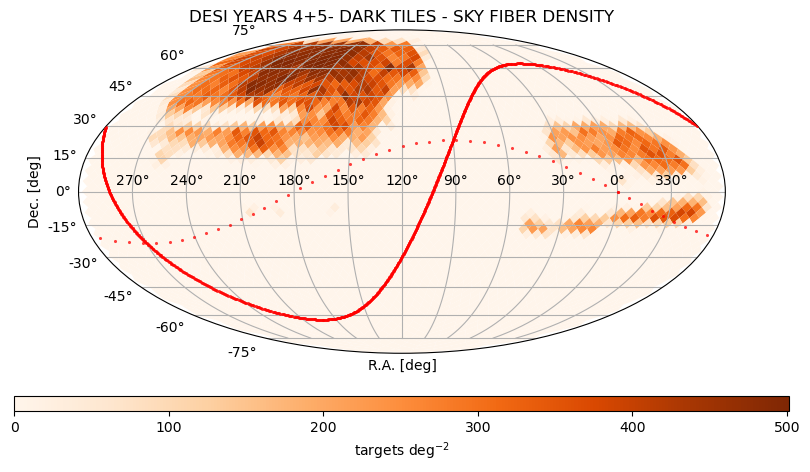

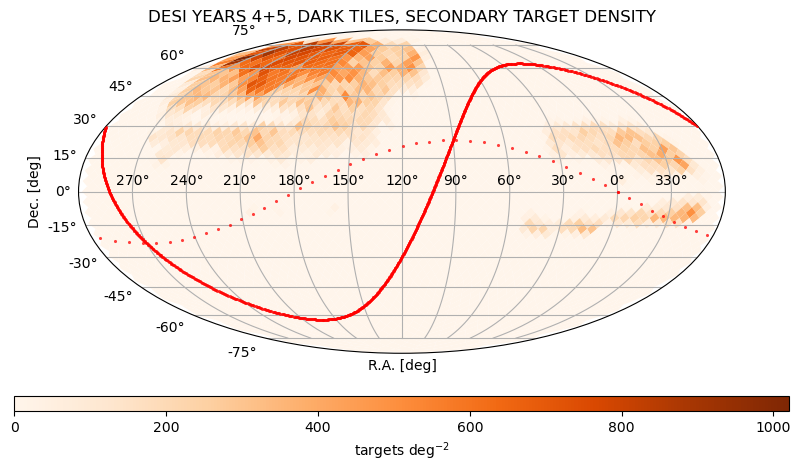

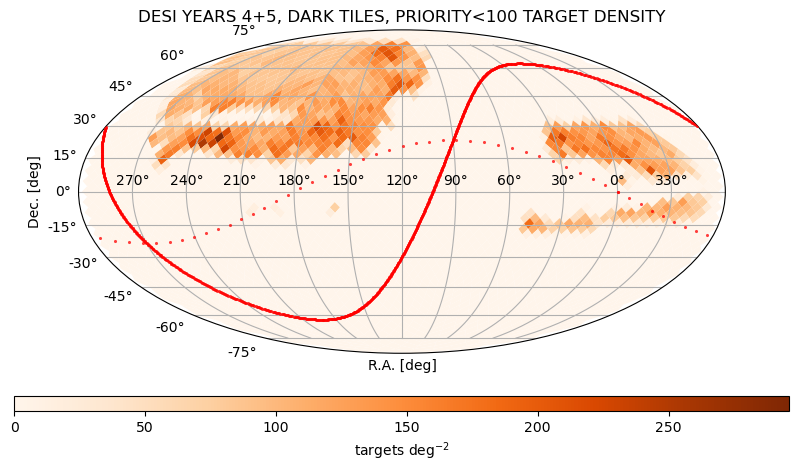

In [41]:
plot_number_density('dark_merged_sim_next_tiles_20240415.fits', label='DARK')

Using healpix map with NSIDE=16 and pixel area 13.429 sq.deg.
Using healpix map with NSIDE=16 and pixel area 13.429 sq.deg.
Using healpix map with NSIDE=16 and pixel area 13.429 sq.deg.


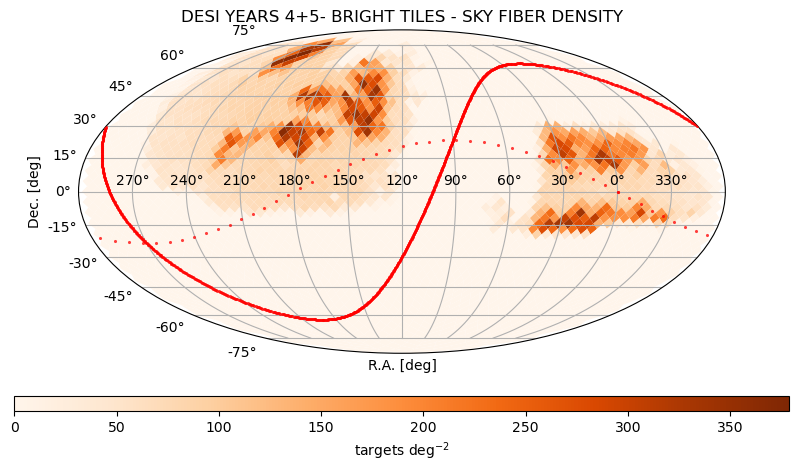

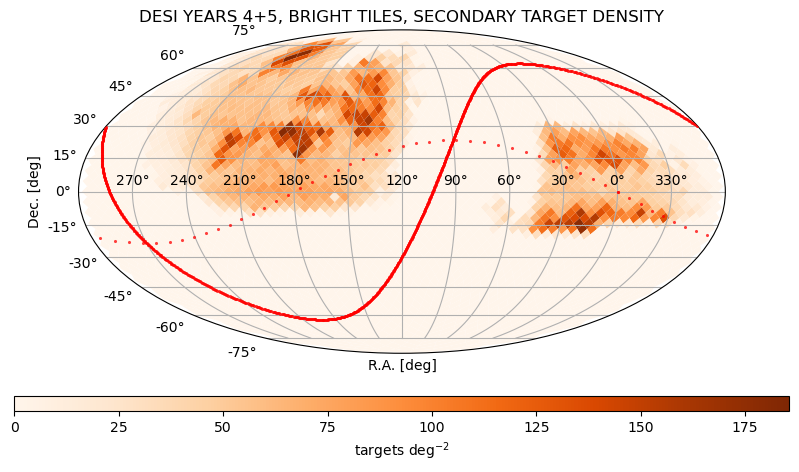

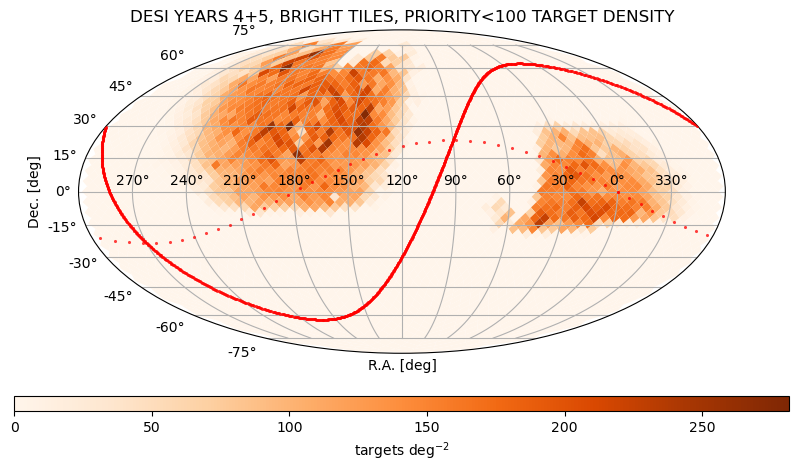

In [42]:
plot_number_density('bright_merged_sim_next_tiles_20240415.fits', label='BRIGHT')